# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
# read the dataset 
data_df = pd.read_csv('IMDb_Movies_India.csv', encoding='ISO-8859-1')

In [235]:
# display the first 5 rows of the dataset
data_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**Geting insights of the dataset**

In [236]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [237]:
data_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [238]:
data_df.shape

(15509, 10)

# TASK #3: PERFORM DATA VISUALIZATION 

<Axes: >

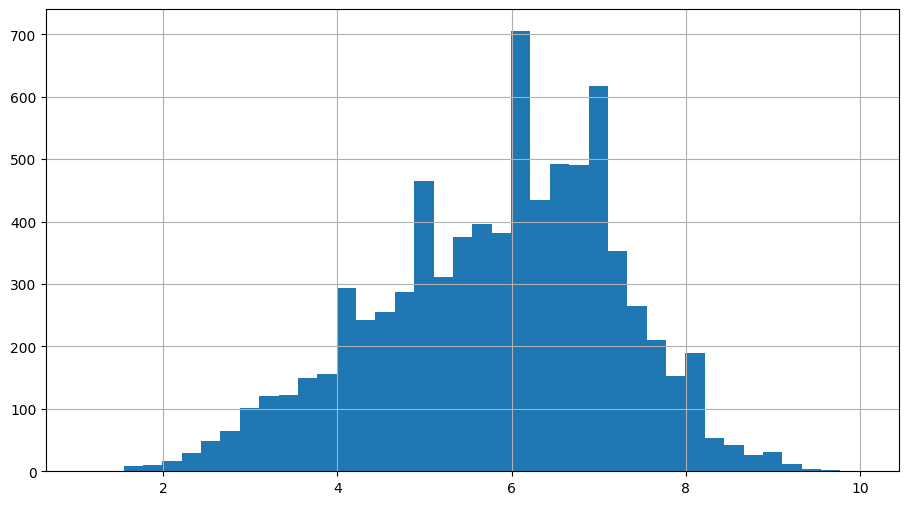

In [239]:
# Rating histogram
plt.figure(figsize=[11,6])
data_df['Rating'].hist(bins=40)

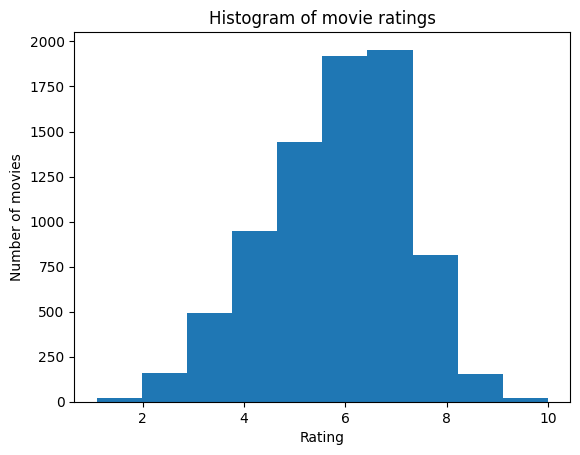

In [240]:
plt.hist(data_df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.title('Histogram of movie ratings')
plt.show()


# TASK #4: PERFORM DATA CLEANING AND FEATURE ENGINEERING

In [241]:
# checking is there any null values in the dataset
data_df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [242]:
# drop the null values from the dataset
data_df.dropna(inplace=True)

In [243]:
data_df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [244]:
data_df = data_df[data_df['Rating'] > 1]
data_df = data_df[data_df['Rating'] < 10]

In [245]:
# extract the features and convert into float
data_df['Year'] = data_df['Year'].str.extract(r'(\d+)').astype(float)
data_df['Duration'] = data_df['Duration'].str.extract(r'(\d+)').astype(float)
data_df['Votes'] = data_df['Votes'].str.replace(',', '').astype(float)

In [246]:
# Encoding categorical features 
data_df = pd.get_dummies(data_df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [247]:
data_df

,Name,Year,Duration,Rating,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime",...,Actor 3_Zara Shah,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019.0,110.0,4.4,35.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997.0,147.0,4.7,827.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,2005.0,142.0,7.4,1086.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,2012.0,82.0,5.6,326.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015.0,115.0,6.1,408.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15494,Zubeidaa,2001.0,153.0,6.2,1496.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,Zulm Ki Zanjeer,1989.0,125.0,5.8,44.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,Zulmi,1999.0,129.0,4.5,655.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# TASK #5: TRAIN LINEAR REGRESSION CLASSIFIER MODEL

In [248]:
# Lets drop the targeted column before train the model
X = data_df.drop(columns=['Name', 'Rating'], axis=1)
y = data_df['Rating']

In [249]:
X

,Year,Duration,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family",...,Actor 3_Zara Shah,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,2019.0,109.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019.0,110.0,35.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997.0,147.0,827.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2005.0,142.0,1086.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2012.0,82.0,326.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015.0,115.0,408.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15494,2001.0,153.0,1496.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,1989.0,125.0,44.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,1999.0,129.0,655.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [250]:
# split the dataset into train and test for 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
# Fitting linear regression model to the training set
from sklearn.linear_model import LinearRegression
classifier_model = LinearRegression()
classifier_model.fit(X_train, y_train)

LinearRegression()

# TASK #6: ASSESS TRAINED MODEL PERFORMANCE

In [252]:
# Predict the model on the test data
y_predict_test = classifier_model.predict(X_test)
y_predict_test

array([ 8.982763  ,  4.96334715, -1.39505128, ...,  3.00678974,
        7.01313709,  6.95574719])

In [253]:
# Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ms_error = mean_squared_error(y_test, y_predict_test,)
root_ms_error = np.sqrt(ms_error)
ma_error = mean_absolute_error(y_test, y_predict_test,)
r2 = r2_score(y_test, y_predict_test)

print(f'Mean squared error: {ms_error: .2f}')
print(f'Root Mean squared error: {root_ms_error: .2f}')
print(f'Mean absolute error: {ma_error: .2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean squared error:  9.51
Root Mean squared error:  3.08
Mean absolute error:  2.16
R-squared (R2) Score: -4.13


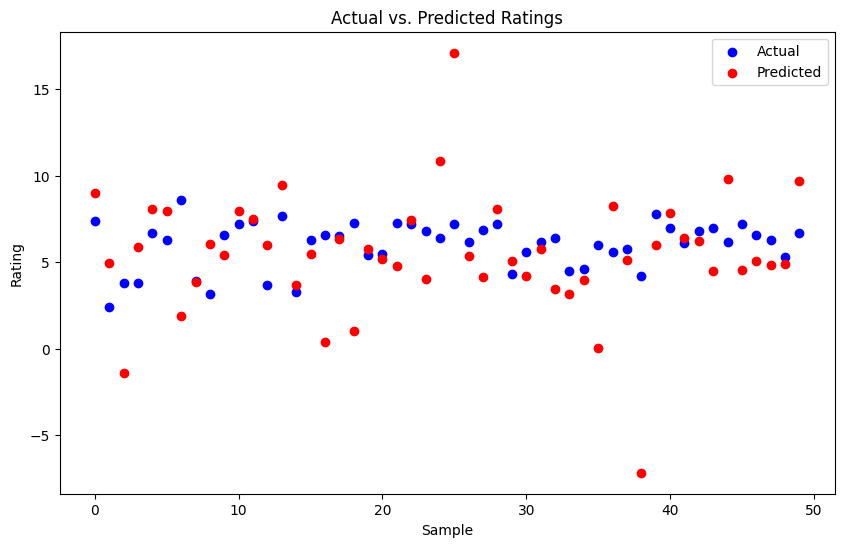

In [254]:
# Visualize the predicted vs. actual ratings (for a sample)
sample_size = 50
plt.figure(figsize=(10, 6))
plt.scatter(range(sample_size), y_test[:sample_size], label='Actual', color='b')
plt.scatter(range(sample_size), y_predict_test[:sample_size], label='Predicted', color='r')
plt.xlabel('Sample')
plt.ylabel('Rating')
plt.legend()
plt.title('Actual vs. Predicted Ratings')
plt.show()
